In [51]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, f1_score, mean_squared_error
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score

In [52]:
df = pd.read_csv('serious-injury-outcome-indicators-2000-18-csv.csv')

X = df.drop(['Severity', 'Series_reference', 'Period', 'Data_value', 'Lower_CI', 'Upper_CI'], axis=1)
y = df['Severity']

X = pd.get_dummies(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=19)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

In [54]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.532520325203252


In [55]:
f1 = f1_score(y_test, y_pred, average='weighted')
print(f'F1 Score: {f1}')

F1 Score: 0.5364199925140758


In [56]:
print(classification_report(y_test, y_pred))

                   precision    recall  f1-score   support

            Fatal       0.69      0.57      0.62       237
          Serious       0.50      0.51      0.50       261
Serious non-fatal       0.45      0.53      0.49       240

         accuracy                           0.53       738
        macro avg       0.55      0.53      0.54       738
     weighted avg       0.55      0.53      0.54       738


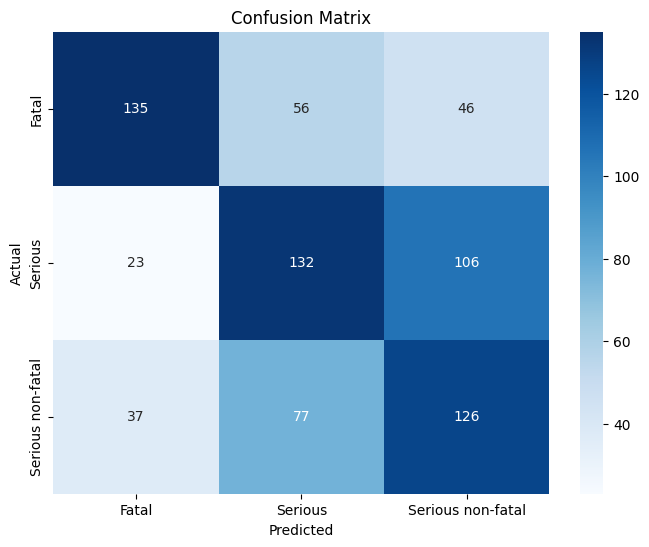

In [42]:
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
